In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.layers import (
    Activation, BatchNormalization, Conv2D, Dense, 
    Dropout, Flatten, GlobalMaxPooling2D, MaxPooling2D
)   
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from load_data import unpickle

In [2]:
plt.style.use('ggplot')

In [3]:
def get_filename(file_num):
    """Get the filename of a CIFAR-10 data batch
    
    Args:
        file_num (int): batch number
        
    Returns:
        filename (str): name of CIFAR-10 data batch
    """
    
    filename = 'data/data_batch_{0}'.format(file_num)
    return filename

def get_inputs(is_test_input=False):
    """Get the inputs from the CIFAR-10 data batches
    
    Args:
        is_test_input (bool): 
            specifies whether or not the inputs are test inputs
    
    Returns:
        X (numpy array): (N, 32, 32, 3) representation of images
        y (numpy array): one-hot encoded image labels
    """
    
    if (is_test_input):    
        batch = unpickle('data/test_batch')
        X, y = batch[b'data'], np.array(batch[b'labels'])
    else:
        files = [get_filename(file_num) for file_num in range(1, 6)]
        batches = [unpickle(file) for file in files]

        data = [batches[i][b'data'] for i in range(0, 5)]
        labels = [batches[i][b'labels'] for i in range(0, 5)]

        X, y = np.concatenate(data), np.concatenate(labels)
    
    X, y = X.reshape(X.shape[0], 32, 32, 3), to_categorical(y)
    X = X / 255
    return X, y

In [4]:
X, y = get_inputs()
X_test, y_test = get_inputs(is_test_input=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3)))
model.add(GlobalMaxPooling2D())
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='Nadam', 
    metrics=['categorical_accuracy']
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 20,042
Trainable params: 20,042
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size=256,
    epochs=10, 
    validation_data=(X_val, y_val)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 54s 1ms/sample - loss: 2.1342 - categorical_accuracy: 0.2217 - val_loss: 2.0038 - val_categorical_accuracy: 0.2768
Epoch 2/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 1.9282 - categorical_accuracy: 0.3182 - val_loss: 1.9192 - val_categorical_accuracy: 0.3147
Epoch 3/10
40000/40000 [==============================] - 51s 1ms/sample - loss: 1.8446 - categorical_accuracy: 0.3530 - val_loss: 1.8484 - val_categorical_accuracy: 0.3456
Epoch 4/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 1.7888 - categorical_accuracy: 0.3753 - val_loss: 1.8168 - val_categorical_accuracy: 0.3519
Epoch 5/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 1.7455 - categorical_accuracy: 0.3930 - val_loss: 1.8715 - val_categorical_accuracy: 0.3287
Epoch 6/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 1.71

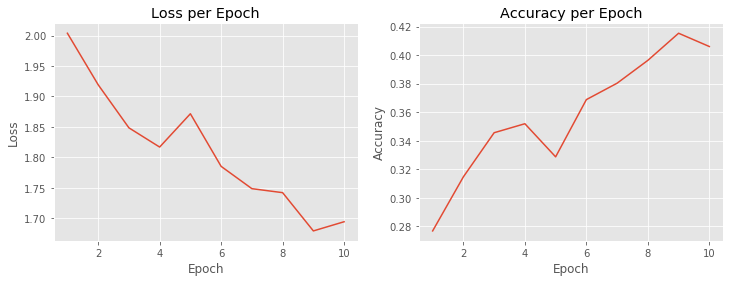

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes = axes.flatten()

loss = sns.lineplot(
    x=np.arange(1, 11), 
    y=history.history['val_loss'], 
    ax=axes[0]
)
loss.set(title="Loss per Epoch", xlabel="Epoch", ylabel="Loss")

accuracy = sns.lineplot(
    x=np.arange(1, 11), 
    y=history.history['val_categorical_accuracy'], 
    ax=axes[1]
)
accuracy.set(title="Accuracy per Epoch", xlabel="Epoch", ylabel="Accuracy")
plt.show()

In [14]:
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.4f loss: %.4f' % (scores[1], scores[0]))

10000/10000 [==============================] - 3s 251us/sample - loss: 1.6864 - categorical_accuracy: 0.4053

Test result: 0.4053 loss: 1.6864
